In [1]:
from regression2 import GD_Model, get_sum_colors
from regression import accuracy, add_neighborhood_feature, add_polynomial_features
from diagram import diagram
import numpy as np

In [12]:
training_data = np.load('5k_data/data.npy')
training_labels = np.load('5k_data/labels.npy')
testing_data = np.load('Task1_Testset500/data.npy')
testing_labels = np.load('Task1_Testset500/labels.npy')

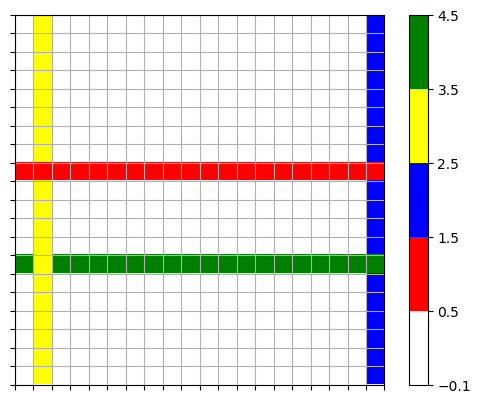

[324  20  18  19  19]
[[324  18  19  19  20]
 [324  18  20  19  19]
 [324  19  20  18  19]
 ...
 [324  19  19  18  20]
 [324  18  19  20  19]
 [324  19  19  20  18]]


In [3]:
from regression2 import get_color_data

dgram = diagram(training_data[35].reshape(20,20))
dgram.showDiagram()
print(get_sum_colors(dgram.data))

print(get_color_data(testing_data))

In [4]:
def fn(x1,x2):
    val = np.ones_like(x1)+2*x1-3*x2
    return np.array([1 if v >=0 else 0 for v in val])


# Debugging test
dumb_data = np.random.rand(1000, 2) # Dummy data
dumb_labels = fn(dumb_data[:,0], dumb_data[:,1])

regr = GD_Model(dumb_data, np.random.rand(dumb_data.shape[1],1),dumb_labels)
print(f'Current loss: {regr.LCE(f=regr(), y=regr.labels)}, Current accuracy: {regr.accuracy()}')
regr.train(2000)


tdata = np.random.rand(500, 2) # Dummy data
tlabels = fn(tdata[:,0], tdata[:,1])

regr.data = tdata
regr.labels = tlabels
print(f'test loss: {regr.LCE(f=regr(), y=regr.labels)}, test accuracy: {regr.accuracy()}')


Current loss: 0.6629782009202227, Current accuracy: 0.656
Training final loss: 1.0256319532324412, Training final accuracy: 0.858
test loss: 0.8797216888184171, test accuracy: 0.852


### Sanity Check Passed
Our model can fit reasonably well to simple linear data which suggests our implementation is correct

Training final loss: 3.1045024782739823, Training final accuracy: 0.5076
Training final loss: 1.274751798074335, Training final accuracy: 0.51
Training final loss: 1.233842869495662, Training final accuracy: 0.5256
Training final loss: 1.212166580367949, Training final accuracy: 0.5242
Training final loss: 1.2027764567151893, Training final accuracy: 0.5264
Training final loss: 1.1717461425316462, Training final accuracy: 0.5274
Training final loss: 1.174721814770616, Training final accuracy: 0.5268
Training final loss: 1.1557974597115253, Training final accuracy: 0.5266
Training final loss: 1.1335254153971603, Training final accuracy: 0.526
Training final loss: 1.1179094225136041, Training final accuracy: 0.5312
Training final loss: 1.1110181367911958, Training final accuracy: 0.533
Training final loss: 1.0911671133002903, Training final accuracy: 0.5354
Training final loss: 1.0855578585675898, Training final accuracy: 0.5384
Training final loss: 1.0689197826815169, Training final acc

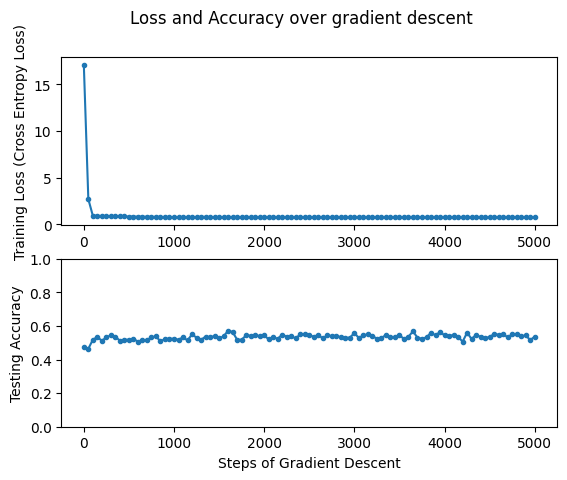

In [19]:
import matplotlib.pyplot as plt
np.random.seed(34)

training_data = np.load('5k_data/data.npy')
training_labels = np.load('5k_data/labels.npy')
testing_data = np.load('Task1_Testset500/data.npy')
testing_labels = np.load('Task1_Testset500/labels.npy')

# For every 50 training steps of gradient descent we will get training loss and testing accuracy values and plot this
# Adding nonlinear feature to testing and training data
train_color_feature = get_color_data(training_data)
test_color_feature = get_color_data(testing_data)

# training_data = train_color_feature
# testing_data = test_color_feature

# training_data = add_polynomial_features(training_data, 3)
# testing_data = add_polynomial_features(testing_data, 3)

training_data = add_neighborhood_feature(training_data)
testing_data = add_neighborhood_feature(testing_data)

# Adding in color feature:
# training_data = np.concatenate((training_data,train_color_feature), axis=1)
# testing_data = np.concatenate((testing_data,test_color_feature), axis=1)

# Add in bias term to both datasets
train_bias = np.ones((training_data.shape[0],1))
test_bias = np.ones((testing_data.shape[0],1))
training_data = np.column_stack((training_data, train_bias))
testing_data = np.column_stack((testing_data, test_bias))


model = GD_Model(training_data, np.random.rand(training_data.shape[1],1), training_labels[:,0])
model2 = GD_Model(testing_data, np.random.rand(training_data.shape[1],1), testing_labels[:,0])
loss_vals = [model.LCE(f=model(), y=model.labels)]
acc_vals = [model2.accuracy()]
iters = [0]
fig, (ax1,ax2) = plt.subplots(2,1)
fig.suptitle('Loss and Accuracy over gradient descent')
ax1.set_ylabel('Training Loss (Cross Entropy Loss)')
ax2.set_ylabel('Testing Accuracy')
ax2.set_xlabel('Steps of Gradient Descent')

for i in range(100):
    model.train(iters=50, batch = 1000, reset_weights = False)
    loss_vals.append(model.LCE(f=model(), y=model.labels))
    model2.w = model.w
    acc_vals.append(model2.accuracy())
    iters.append((i+1)*50)
losses = np.array(loss_vals)
accs = np.array(acc_vals)
iters = np.array(iters)
ax1.plot(iters, losses,'.-')
ax2.set_ylim((0,1))
ax2.plot(iters, accs, '.-')
plt.show()


In [59]:
fig.savefig('task1plot_using_neighborhood_feature.jpg', format='jpg')